# Import Libraries

In [30]:
import pandas as pd
import numpy as np

# Analysis & cleansing
from scipy import stats
from sklearn.preprocessing import MinMaxScaler
from collections import Counter

# Data visualizations
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

# Main Model
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

# To Ignore Warnings
#import warnings
#warnings.filterwarnings('ignore')


# Reading Starcraft Player Dataset 

In [38]:
df = pd.read_csv("starcraft_player_data.csv")
df.head(10)

,GameID,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
0,52,5,27,10,3000,143.7180,0.003515,0.000220,7,0.000110,0.000392,0.004849,32.6677,40.8673,4.7508,28,0.001397,6,0.000000,0.000000
1,55,5,23,10,5000,129.2322,0.003304,0.000259,4,0.000294,0.000432,0.004307,32.9194,42.3454,4.8434,22,0.001193,5,0.000000,0.000208
2,56,4,30,10,200,69.9612,0.001101,0.000336,4,0.000294,0.000461,0.002926,44.6475,75.3548,4.0430,22,0.000745,6,0.000000,0.000189
3,57,3,19,20,400,107.6016,0.001034,0.000213,1,0.000053,0.000543,0.003783,29.2203,53.7352,4.9155,19,0.000426,7,0.000000,0.000384
4,58,3,32,10,500,122.8908,0.001136,0.000327,2,0.000000,0.001329,0.002368,22.6885,62.0813,9.3740,15,0.001174,4,0.000000,0.000019
5,60,2,27,6,70,44.4570,0.000978,0.000255,2,0.000000,0.000000,0.002425,76.4405,98.7719,3.0965,16,0.000372,6,0.000000,0.000000
6,61,1,21,8,240,46.9962,0.000820,0.000169,6,0.000000,0.000045,0.001988,94.0227,90.5311,4.1017,15,0.000573,5,0.000000,0.000000
7,72,7,17,42,10000,212.6022,0.009040,0.000676,6,0.001164,0.001253,0.004952,24.6117,41.7671,6.6104,45,0.002277,9,0.000129,0.000249
8,77,4,20,14,2708,117.4884,0.002944,0.000527,2,0.000019,0.000414,0.005399,52.0140,46.4321,3.3746,29,0.001035,7,0.000273,0.000470
9,81,4,18,24,800,155.9856,0.005054,0.000524,8,0.000025,0.000399,0.003569,24.4632,52.1538,6.5664,27,0.001310,6,0.000000,0.000000


In [39]:
# Checking the data type and information about data

df.info()

# Based on this, I can see that some of the object columns should be ints. Since it would be an issue to do numerical analysis on strings.
# [Age, HoursPerWeek, TotalHours] will have to be further examined
# There does not seem to be any Null values but further analysis is needed

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3395 entries, 0 to 3394
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   GameID                3395 non-null   int64  
 1   LeagueIndex           3395 non-null   int64  
 2   Age                   3395 non-null   object 
 3   HoursPerWeek          3395 non-null   object 
 4   TotalHours            3395 non-null   object 
 5   APM                   3395 non-null   float64
 6   SelectByHotkeys       3395 non-null   float64
 7   AssignToHotkeys       3395 non-null   float64
 8   UniqueHotkeys         3395 non-null   int64  
 9   MinimapAttacks        3395 non-null   float64
 10  MinimapRightClicks    3395 non-null   float64
 11  NumberOfPACs          3395 non-null   float64
 12  GapBetweenPACs        3395 non-null   float64
 13  ActionLatency         3395 non-null   float64
 14  ActionsInPAC          3395 non-null   float64
 15  TotalMapExplored     

In [40]:
# Checking for number of missing values in each column
df.isnull().sum()

# Although it is listed 0, I am still wary about obj columns [Age, HoursPerWeek, TotalHours] 

GameID                  0
LeagueIndex             0
Age                     0
HoursPerWeek            0
TotalHours              0
APM                     0
SelectByHotkeys         0
AssignToHotkeys         0
UniqueHotkeys           0
MinimapAttacks          0
MinimapRightClicks      0
NumberOfPACs            0
GapBetweenPACs          0
ActionLatency           0
ActionsInPAC            0
TotalMapExplored        0
WorkersMade             0
UniqueUnitsMade         0
ComplexUnitsMade        0
ComplexAbilitiesUsed    0
dtype: int64

In [41]:
# Checking the distribution in samples for each LeagueIndex rank

df.groupby('LeagueIndex').size()

# There is a difference in samples for each rank which could be a class Imbalance problem later on

LeagueIndex
1    167
2    347
3    553
4    811
5    806
6    621
7     35
8     55
dtype: int64

In [36]:
# Checking for duplication
df.nunique()

# Based on further analysis, duplicate data should be handled or removed

GameID                  3395
LeagueIndex                8
Age                       29
HoursPerWeek              33
TotalHours               238
APM                     3374
SelectByHotkeys         3375
AssignToHotkeys         3361
UniqueHotkeys             11
MinimapAttacks          2471
MinimapRightClicks      3302
NumberOfPACs            3386
GapBetweenPACs          3358
ActionLatency           3367
ActionsInPAC            3223
TotalMapExplored          52
WorkersMade             3256
UniqueUnitsMade           12
ComplexUnitsMade        1110
ComplexAbilitiesUsed    1828
dtype: int64

## Some Data Reduction

In [12]:
# Checking if there was actually nulls in the columns [Age, HoursPerWeek, TotalHours] that made it datatpe Obj
obj_columns = df.iloc[:, [2, 3, 4]]
print(obj_columns)

     Age HoursPerWeek TotalHours
0     27           10       3000
1     23           10       5000
2     30           10        200
3     19           20        400
4     32           10        500
...   ..          ...        ...
3390   ?            ?          ?
3391   ?            ?          ?
3392   ?            ?          ?
3393   ?            ?          ?
3394   ?            ?          ?

[3395 rows x 3 columns]


In [46]:
# The nulls were placed as question marks

# Output all data table that contains the question mark
rows_with_question = df[df['TotalHours'] == '?']
rows_with_question

# Nulls are almost all of LeagueIndex 8

,GameID,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
358,1064,5,17,20,?,94.4724,0.003846,0.000783,3,0.000010,0.000135,0.004474,50.5455,54.9287,3.0972,31,0.000763,7,0.000106,0.000116
1841,5255,5,18,?,?,122.2470,0.006357,0.000433,3,0.000014,0.000257,0.003043,30.8929,62.2933,5.3822,23,0.001055,5,0.000000,0.000338
3340,10001,8,?,?,?,189.7404,0.004582,0.000655,4,0.000073,0.000618,0.006291,23.5130,32.5665,4.4451,25,0.002218,6,0.000000,0.000000
3341,10005,8,?,?,?,287.8128,0.029040,0.001041,9,0.000231,0.000656,0.005399,31.6416,36.1143,4.5893,34,0.001138,6,0.000058,0.000000
3342,10006,8,?,?,?,294.0996,0.029640,0.001076,6,0.000302,0.002374,0.006294,16.6393,36.8192,4.1850,26,0.000987,6,0.000000,0.000000
3343,10015,8,?,?,?,274.2552,0.018121,0.001264,8,0.000053,0.000975,0.007111,10.6419,24.3556,4.3870,28,0.001106,6,0.000000,0.000000
3344,10016,8,?,?,?,274.3404,0.023131,0.000739,8,0.000622,0.003552,0.005355,19.1568,36.3098,5.2811,28,0.000739,6,0.000000,0.000000
3345,10017,8,?,?,?,245.8188,0.010471,0.000841,10,0.000657,0.001314,0.005031,14.5518,36.7134,7.1943,33,0.001474,11,0.000040,0.000048
3346,10018,8,?,?,?,211.0722,0.013049,0.000940,10,0.000366,0.000909,0.003719,19.6169,38.9326,7.1320,23,0.000898,9,0.000000,0.000000
3347,10021,8,?,?,?,189.5778,0.007559,0.000487,10,0.000606,0.000566,0.005821,22.0317,36.7330,4.9050,28,0.000540,5,0.000000,0.000000


> If I remove the rows with missing values it would remove almost all the rows for Rank 8. Instead I will just remove those columns. I also believe that Age may not be as valuable of an insight due to multiple factors (ethics/privacy, exposure in age differences).  
In addition to that, drop other columns that might not add value or predictive power. In this instance we are trying to predict the rank of a player. The GameID column only has ID values. Unless we need to know the specific player this would not add any other insight.

In [56]:
# Assigning columns to remove
Remove_columns = ['Age', 'TotalHours', 'HoursPerWeek', 'GameID' ]

New_df = df.drop(columns=Remove_columns)

New_df

,LeagueIndex,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
0,5,143.7180,0.003515,0.000220,7,0.000110,0.000392,0.004849,32.6677,40.8673,4.7508,28,0.001397,6,0.000000,0.000000
1,5,129.2322,0.003304,0.000259,4,0.000294,0.000432,0.004307,32.9194,42.3454,4.8434,22,0.001193,5,0.000000,0.000208
2,4,69.9612,0.001101,0.000336,4,0.000294,0.000461,0.002926,44.6475,75.3548,4.0430,22,0.000745,6,0.000000,0.000189
3,3,107.6016,0.001034,0.000213,1,0.000053,0.000543,0.003783,29.2203,53.7352,4.9155,19,0.000426,7,0.000000,0.000384
4,3,122.8908,0.001136,0.000327,2,0.000000,0.001329,0.002368,22.6885,62.0813,9.3740,15,0.001174,4,0.000000,0.000019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3390,8,259.6296,0.020425,0.000743,9,0.000621,0.000146,0.004555,18.6059,42.8342,6.2754,46,0.000877,5,0.000000,0.000000
3391,8,314.6700,0.028043,0.001157,10,0.000246,0.001083,0.004259,14.3023,36.1156,7.1965,16,0.000788,4,0.000000,0.000000
3392,8,299.4282,0.028341,0.000860,7,0.000338,0.000169,0.004439,12.4028,39.5156,6.3979,19,0.001260,4,0.000000,0.000000
3393,8,375.8664,0.036436,0.000594,5,0.000204,0.000780,0.004346,11.6910,34.8547,7.9615,15,0.000613,6,0.000000,0.000631


# EDA Process

In [48]:
# Finding the statisics summary
New_df.describe()

,LeagueIndex,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
count,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000
mean,4.184094,117.046947,0.004299,0.000374,4.364654,0.000098,0.000387,0.003463,40.361562,63.739403,5.272988,22.131664,0.001032,6.534021,0.000059,0.000142
std,1.517327,51.945291,0.005284,0.000225,2.360333,0.000166,0.000377,0.000992,17.153570,19.238869,1.494835,7.431719,0.000519,1.857697,0.000111,0.000265
min,1.000000,22.059600,0.000000,0.000000,0.000000,0.000000,0.000000,0.000679,6.666700,24.093600,2.038900,5.000000,0.000077,2.000000,0.000000,0.000000
25%,3.000000,79.900200,0.001258,0.000204,3.000000,0.000000,0.000140,0.002754,28.957750,50.446600,4.272850,17.000000,0.000683,5.000000,0.000000,0.000000
50%,4.000000,108.010200,0.002500,0.000353,4.000000,0.000040,0.000281,0.003395,36.723500,60.931800,5.095500,22.000000,0.000905,6.000000,0.000000,0.000020
75%,5.000000,142.790400,0.005133,0.000499,6.000000,0.000119,0.000514,0.004027,48.290500,73.681300,6.033600,27.000000,0.001259,8.000000,0.000086,0.000181
max,8.000000,389.831400,0.043088,0.001752,10.000000,0.003019,0.004041,0.007971,237.142900,176.372100,18.558100,58.000000,0.005149,13.000000,0.000902,0.003084


In [54]:
# Column names to visualize
num_cols = New_df.drop('LeagueIndex', axis=1).columns
num_cols

Index(['APM', 'SelectByHotkeys', 'AssignToHotkeys', 'UniqueHotkeys',
       'MinimapAttacks', 'MinimapRightClicks', 'NumberOfPACs',
       'GapBetweenPACs', 'ActionLatency', 'ActionsInPAC', 'TotalMapExplored',
       'WorkersMade', 'UniqueUnitsMade', 'ComplexUnitsMade',
       'ComplexAbilitiesUsed'],
      dtype='object')

APM
Skew : 1.2


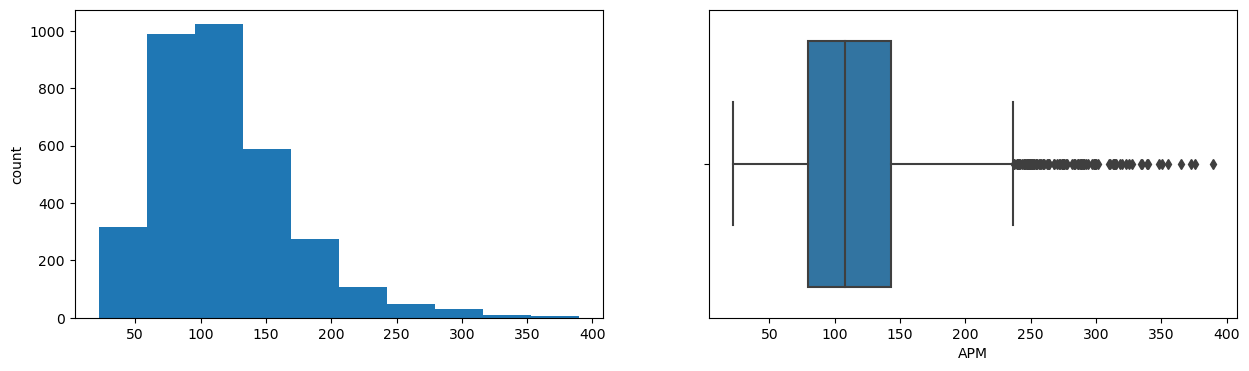

SelectByHotkeys
Skew : 2.97


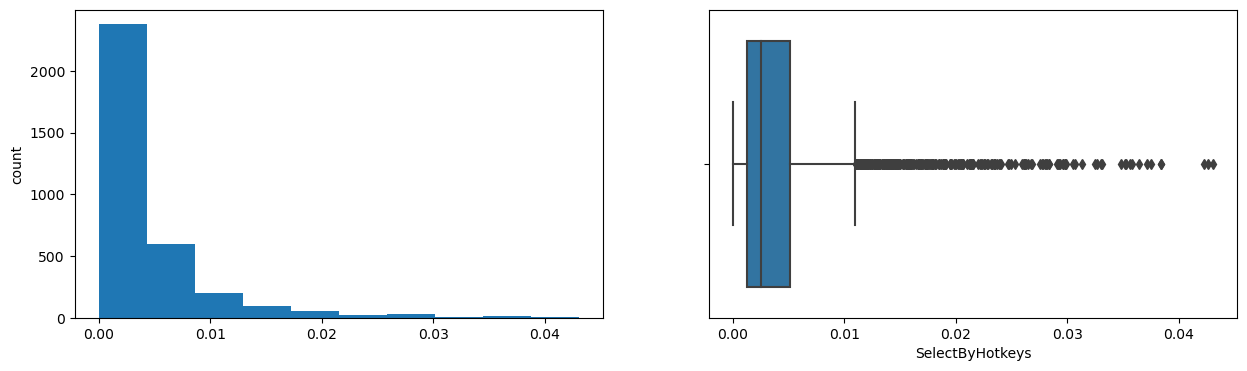

AssignToHotkeys
Skew : 1.14


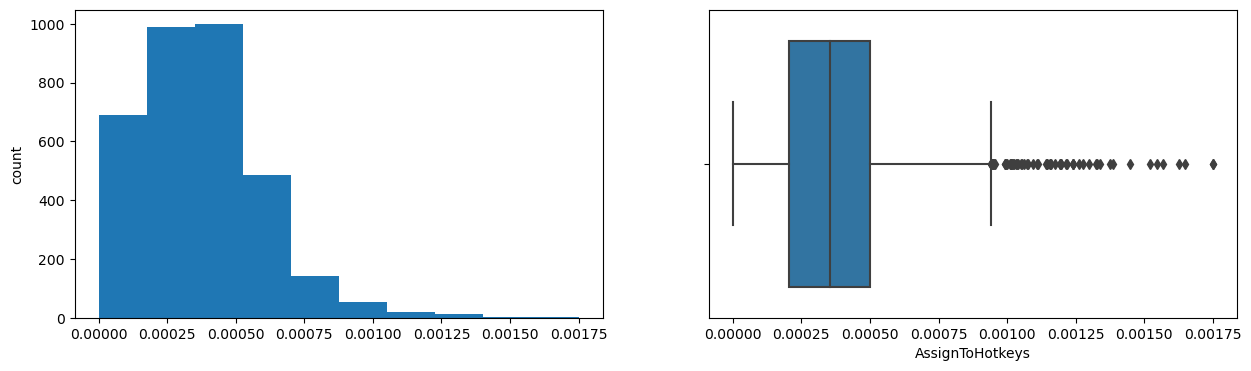

UniqueHotkeys
Skew : 0.21


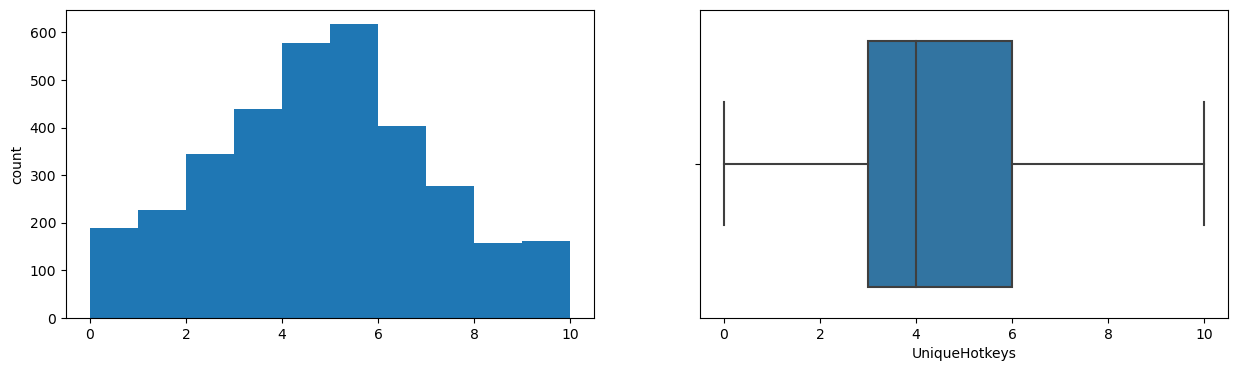

MinimapAttacks
Skew : 4.82


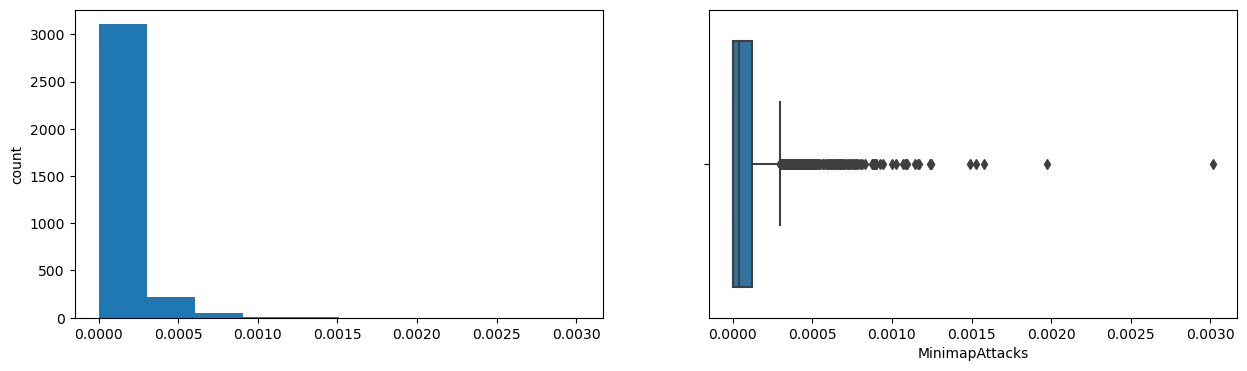

MinimapRightClicks
Skew : 2.56


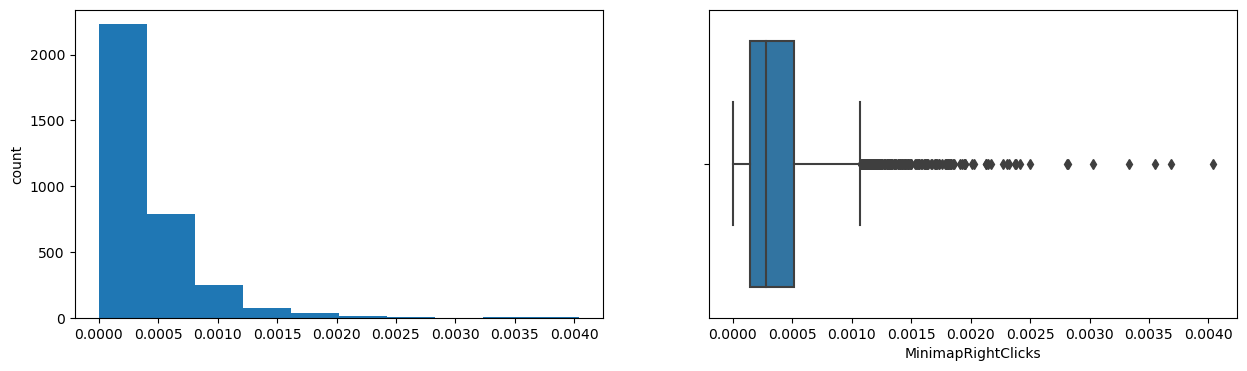

NumberOfPACs
Skew : 0.55


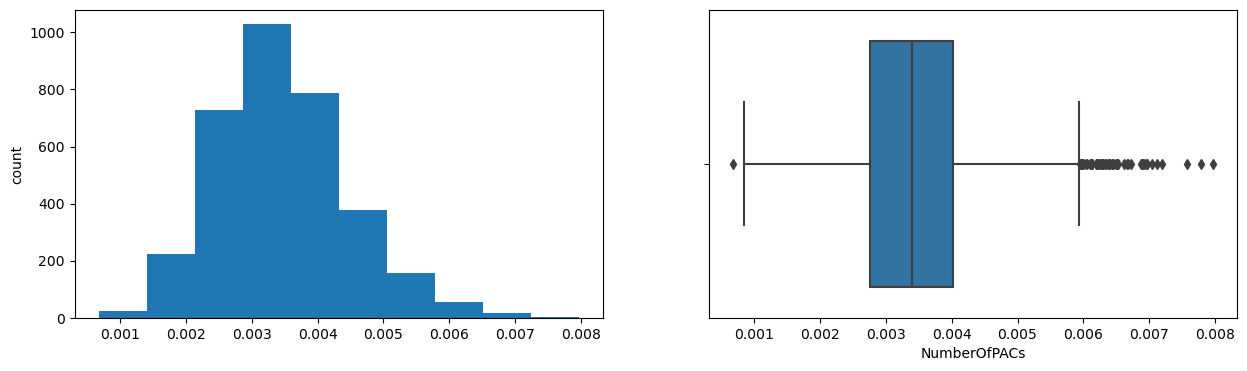

GapBetweenPACs
Skew : 1.91


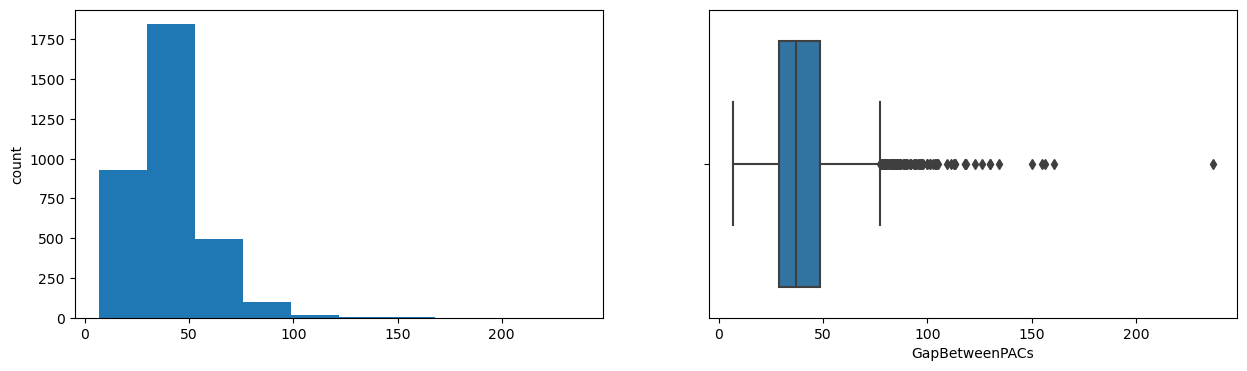

ActionLatency
Skew : 1.15


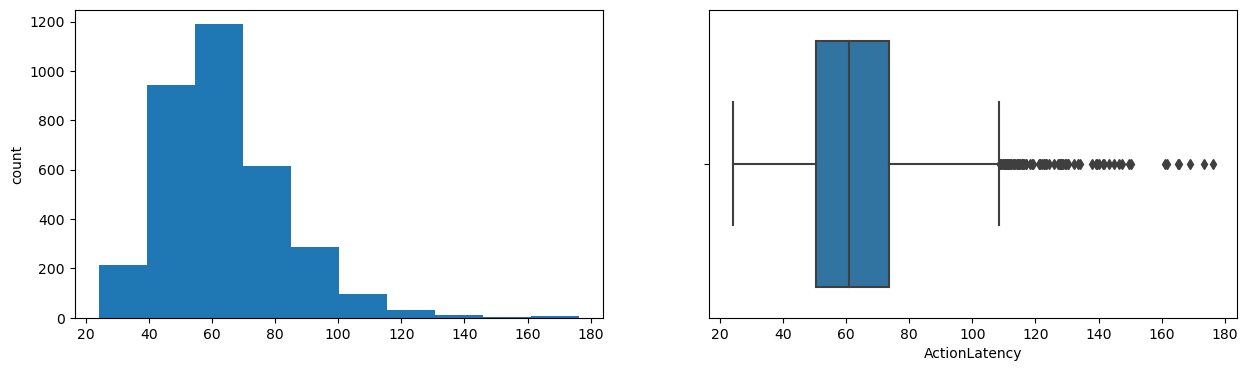

ActionsInPAC
Skew : 1.6


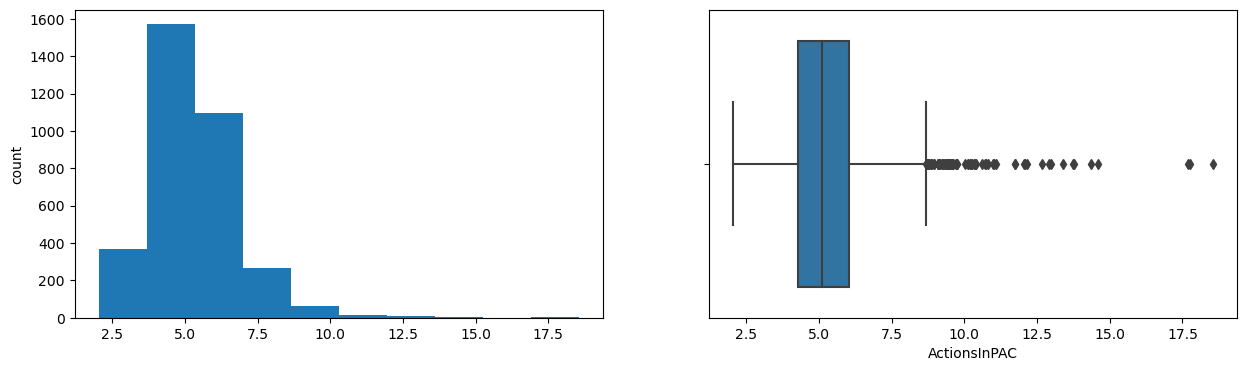

TotalMapExplored
Skew : 0.63


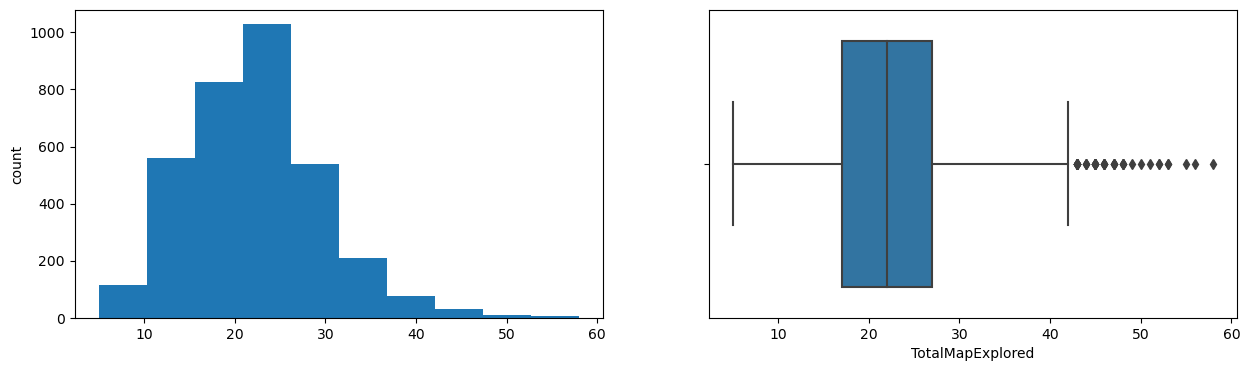

WorkersMade
Skew : 1.66


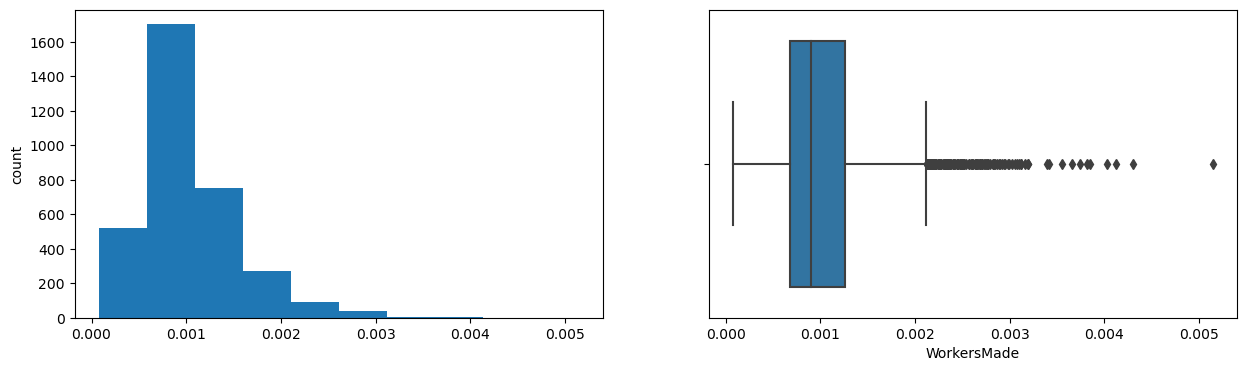

UniqueUnitsMade
Skew : 0.19


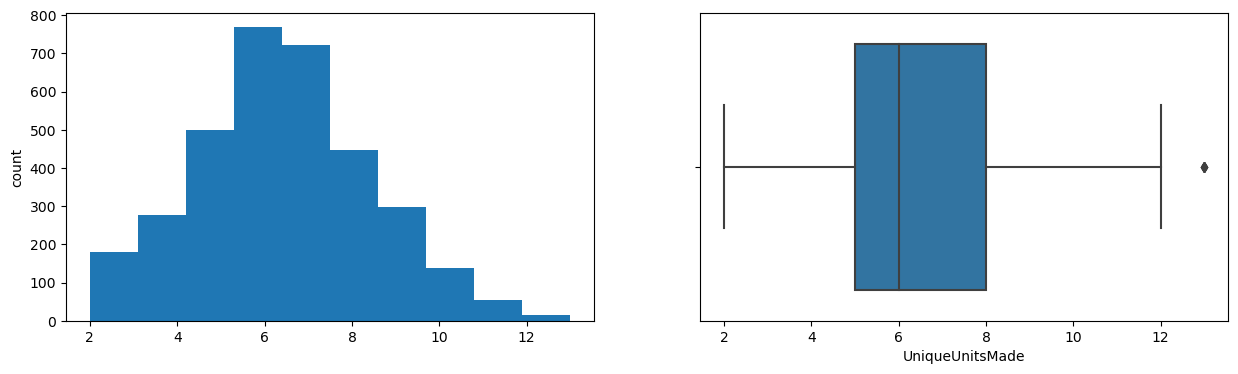

ComplexUnitsMade
Skew : 2.3


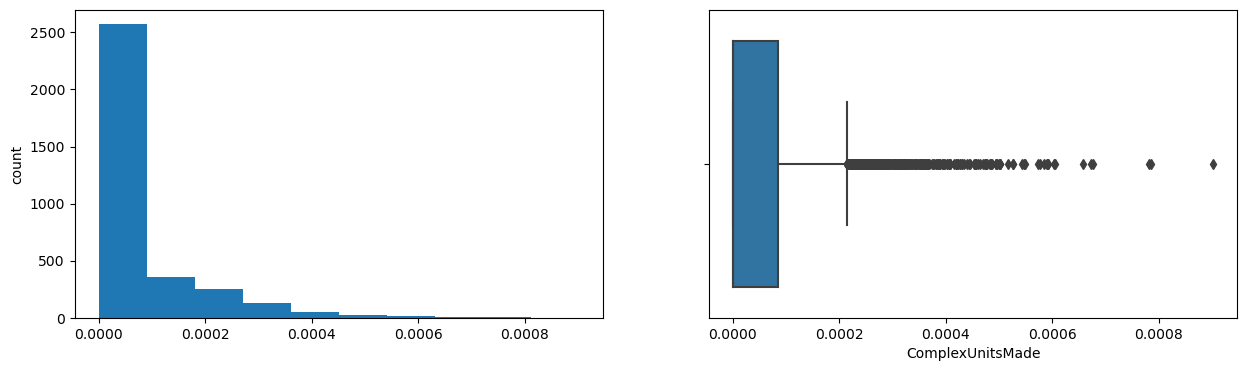

ComplexAbilitiesUsed
Skew : 3.78


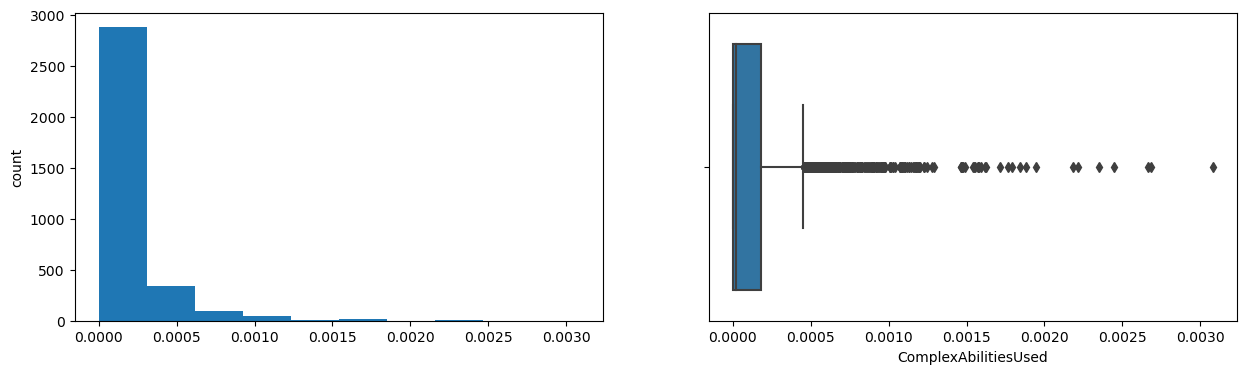

In [55]:
# Using Box and histogram plots for num_cols

for col in num_cols:
    print(col)
    print('Skew :', round(New_df[col].skew(), 2))
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    New_df[col].hist(grid=False)
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=New_df[col])
    plt.show()

> Based on the Box plots, there is visable instances of outliers in some of the features. Based on the Histogram, there is some features that are highly right skewed and on different scales. This means that there needs to be normalization to maintain standard scale with other variables and for outliers to be handled.  

In [ ]:
# Function for log transformation on columns needed

# Right skewed columns
columns = ['APM', 'SelectByHotkeys', 'AssignToHotkeys', 'MinimapAttacks', 'MinimapRightClicks', 'GapBetweenPACs', 
           'ActionLatency', 'ActionsInPAC', 'WorkersMade', 'ComplexUnitsMade','ComplexAbilitiesUsed']

In [20]:

# Normalizing data (Besides LeagueIndex) to better scale

scaler = MinMaxScaler()
columns_to_normalize = cleaned_data.columns.drop("LeagueIndex")
df_normalized = pd.DataFrame(scaler.fit_transform(cleaned_data[columns_to_normalize]), columns=columns_to_normalize)

df_normalized["LeagueIndex"] = cleaned_data["LeagueIndex"]  # Add the LeagueIndex column back to the normalized DataFrame
df_normalized

,GameID,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed,LeagueIndex
0,0.000000,0.469627,0.174465,0.212317,0.7,0.186025,0.261933,0.699053,0.306744,0.128069,0.351688,0.589744,0.511363,0.4,0.000000,0.000000,5
1,0.000299,0.409468,0.163975,0.250746,0.4,0.497975,0.288719,0.595675,0.309714,0.144085,0.363696,0.435897,0.427016,0.3,0.000000,0.223172,5
2,0.000399,0.163315,0.054649,0.324298,0.4,0.497242,0.308063,0.332197,0.448075,0.501750,0.259898,0.435897,0.240569,0.4,0.000000,0.202948,4
3,0.000498,0.319636,0.051297,0.205943,0.1,0.090220,0.362811,0.495627,0.266074,0.267496,0.373047,0.358974,0.108359,0.5,0.000000,0.412412,3
4,0.000598,0.383132,0.056383,0.316330,0.2,0.000000,0.887021,0.225865,0.189016,0.357928,0.951239,0.256410,0.419125,0.2,0.000000,0.020701,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2854,0.996810,0.662832,0.432796,0.849796,1.0,0.289552,0.228315,0.722258,0.133587,0.074799,0.460155,0.410256,0.306688,0.3,0.000000,0.000000,8
2855,0.997508,0.783891,0.294110,0.715842,0.6,0.745363,0.473048,0.763151,0.122444,0.016108,0.601211,0.769231,0.791812,0.7,0.574142,0.069252,8
2856,0.998006,0.938380,0.972397,0.560261,0.8,0.704855,0.238194,0.882777,0.122451,0.057706,0.391306,0.358974,0.474609,0.5,0.000000,0.000000,8
2857,0.998106,0.904377,0.795025,0.844379,0.9,0.657614,0.248465,0.916051,0.113818,0.013013,0.396623,0.410256,0.428594,0.4,0.000000,0.000000,8


In [21]:
league_means = df_normalized.groupby('LeagueIndex').mean().drop('GameID', axis=1)
league_means


,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
LeagueIndex,,,,,,,,,,,,,,,
1,0.138172,0.056427,0.190026,0.313953,0.043963,0.146642,0.253865,0.575009,0.632697,0.328799,0.339495,0.198047,0.375969,0.034699,0.047578
2,0.187805,0.077655,0.222399,0.341424,0.069519,0.172352,0.291500,0.526594,0.540919,0.370727,0.382790,0.263830,0.411974,0.050284,0.061347
3,0.244775,0.108667,0.274770,0.370949,0.092119,0.208800,0.348379,0.456324,0.472854,0.388323,0.397284,0.304912,0.437945,0.091422,0.092869
4,0.301481,0.149199,0.321359,0.392255,0.115617,0.227486,0.405950,0.406037,0.389611,0.397274,0.428442,0.336648,0.455571,0.128566,0.117518
5,0.394784,0.217643,0.390887,0.458918,0.156624,0.254013,0.487659,0.335396,0.296504,0.421297,0.454266,0.388705,0.459942,0.154507,0.146209
6,0.490313,0.306912,0.468082,0.541277,0.204204,0.279912,0.575630,0.282064,0.220604,0.425880,0.471795,0.406755,0.475957,0.142990,0.151944
7,0.573348,0.403316,0.602449,0.687500,0.362997,0.293739,0.676991,0.234419,0.154474,0.391846,0.554487,0.381558,0.512500,0.270889,0.168917
8,0.728446,0.607255,0.771396,0.733333,0.410465,0.346685,0.738556,0.180823,0.100250,0.415568,0.455840,0.463476,0.422222,0.063794,0.019541


In [25]:
# Correlation plot
correlation_matrix = df_normalized.corr()

# Print the correlation matrix
correlation_matrix

,GameID,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed,LeagueIndex
GameID,1.000000,0.086085,0.077109,0.067124,0.096373,0.049832,0.013162,0.058085,-0.088047,-0.060238,0.030315,0.036827,-0.020217,0.041925,-0.009728,-0.023035,0.045560
APM,0.086085,1.000000,0.791798,0.509965,0.311637,0.240925,0.300302,0.673914,-0.600382,-0.776736,0.433359,0.252352,0.412677,0.117905,0.153937,0.122621,0.608780
SelectByHotkeys,0.077109,0.791798,1.000000,0.483795,0.273678,0.176462,0.110776,0.425498,-0.314226,-0.454572,0.157611,0.125595,0.207648,0.030726,0.086048,0.080396,0.449588
AssignToHotkeys,0.067124,0.509965,0.483795,1.000000,0.384844,0.197504,0.137612,0.424177,-0.350829,-0.436159,0.086830,0.168196,0.190836,0.138058,0.171390,0.206211,0.454695
UniqueHotkeys,0.096373,0.311637,0.273678,0.384844,1.000000,0.150237,0.089977,0.323912,-0.208152,-0.280392,-0.010560,0.238579,0.102379,0.208544,0.113792,0.093218,0.299393
MinimapAttacks,0.049832,0.240925,0.176462,0.197504,0.150237,1.000000,0.212080,0.149283,-0.238298,-0.197013,0.140070,0.145209,0.072544,0.104260,0.064505,0.070204,0.280284
MinimapRightClicks,0.013162,0.300302,0.110776,0.137612,0.089977,0.212080,1.000000,0.121985,-0.229800,-0.212363,0.333234,0.170008,0.233567,0.172580,0.075617,0.079616,0.190242
NumberOfPACs,0.058085,0.673914,0.425498,0.424177,0.323912,0.149283,0.121985,1.000000,-0.468038,-0.827496,-0.223627,0.448628,0.277384,0.285027,0.182604,0.166863,0.567469
GapBetweenPACs,-0.088047,-0.600382,-0.314226,-0.350829,-0.208152,-0.238298,-0.229800,-0.468038,1.000000,0.633160,-0.362457,-0.061216,-0.225214,-0.054092,-0.065906,-0.113055,-0.501425
ActionLatency,-0.060238,-0.776736,-0.454572,-0.436159,-0.280392,-0.197013,-0.212363,-0.827496,0.633160,1.000000,-0.147176,-0.328605,-0.322119,-0.183846,-0.173497,-0.184622,-0.642893


In [26]:
# Correlation based on LeagueIndex
target_correlations = correlation_matrix['LeagueIndex']
target_correlations

GameID                  0.045560
APM                     0.608780
SelectByHotkeys         0.449588
AssignToHotkeys         0.454695
UniqueHotkeys           0.299393
MinimapAttacks          0.280284
MinimapRightClicks      0.190242
NumberOfPACs            0.567469
GapBetweenPACs         -0.501425
ActionLatency          -0.642893
ActionsInPAC            0.134472
TotalMapExplored        0.201441
WorkersMade             0.297882
UniqueUnitsMade         0.125014
ComplexUnitsMade        0.159173
ComplexAbilitiesUsed    0.169843
LeagueIndex             1.000000
Name: LeagueIndex, dtype: float64

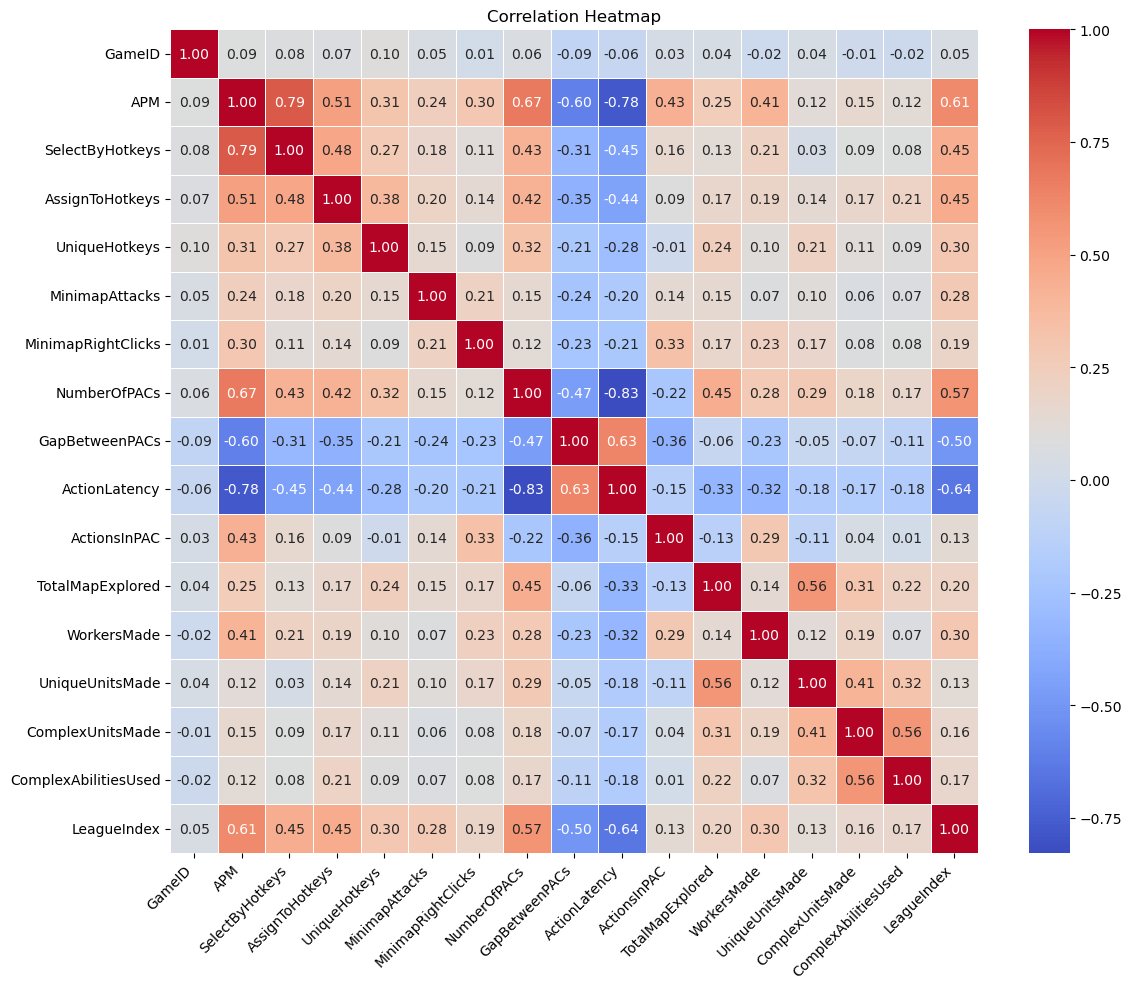

In [27]:
# Heatmap to visualize correlation

# Set the figure size
plt.figure(figsize=(12, 10))

# Customize the heatmap to fit
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# title
plt.title('Correlation Heatmap')

# Rotate x-axis labels
plt.xticks(rotation=45, ha='right')

# Adjust spacing
plt.tight_layout()

plt.show()

In [255]:

# After cleaning and analyzing the data. 
# Drop features with multiple highly correlated values, weakly related features and reduce overfitting.
# Also using some domain knowledge to figure out irrelevant/important features

dropping = ['GameID', 'SelectByHotkeys', 'UniqueHotkeys', 'MinimapAttacks', 'MinimapRightClicks', 'ActionLatency', 
            'ComplexUnitsMade','UniqueUnitsMade', 'TotalMapExplored']

starcraft_df = cleaned_data.drop(columns=dropping) #dropping from cleaned data set

starcraft_df

,LeagueIndex,APM,AssignToHotkeys,NumberOfPACs,GapBetweenPACs,ActionsInPAC,WorkersMade,ComplexAbilitiesUsed
0,5,143.7180,0.000220,0.004849,32.6677,4.7508,0.001397,0.000000
1,5,129.2322,0.000259,0.004307,32.9194,4.8434,0.001193,0.000208
2,4,69.9612,0.000336,0.002926,44.6475,4.0430,0.000745,0.000189
3,3,107.6016,0.000213,0.003783,29.2203,4.9155,0.000426,0.000384
4,3,122.8908,0.000327,0.002368,22.6885,9.3740,0.001174,0.000019
...,...,...,...,...,...,...,...,...
2854,8,190.2396,0.000879,0.004971,17.9901,5.5872,0.000904,0.000000
2855,8,219.3894,0.000741,0.005185,17.0456,6.6749,0.002072,0.000064
2856,8,256.5888,0.000580,0.005812,17.0462,5.0563,0.001308,0.000000
2857,8,248.4012,0.000874,0.005987,16.3144,5.0973,0.001197,0.000000


In [ ]:
# Applying SMOTE for impbalanced classes


# Modeling

### Input Features (Player stats)

In [428]:
X = starcraft_df.iloc[:, 1:9].values
X

array([[1.4371800e+02, 2.1969740e-04, 4.8490365e-03, ..., 4.7508000e+00,
        1.3966000e-03, 0.0000000e+00],
       [1.2923220e+02, 2.5946170e-04, 4.3070643e-03, ..., 4.8434000e+00,
        1.1935000e-03, 2.0757000e-04],
       [6.9961200e+01, 3.3557050e-04, 2.9257550e-03, ..., 4.0430000e+00,
        7.4455000e-04, 1.8876000e-04],
       ...,
       [2.5658880e+02, 5.7973600e-04, 5.8122250e-03, ..., 5.0563000e+00,
        1.3081000e-03, 0.0000000e+00],
       [2.4840120e+02, 8.7372990e-04, 5.9866675e-03, ..., 5.0973000e+00,
        1.1973000e-03, 0.0000000e+00],
       [1.5140460e+02, 9.4911600e-04, 4.3631006e-03, ..., 4.3312000e+00,
        9.4912000e-04, 9.9161000e-05]])

In [429]:
test_row = starcraft_df.iloc[:, 1:9].values
test_row

array([[1.4371800e+02, 2.1969740e-04, 4.8490365e-03, ..., 4.7508000e+00,
        1.3966000e-03, 0.0000000e+00],
       [1.2923220e+02, 2.5946170e-04, 4.3070643e-03, ..., 4.8434000e+00,
        1.1935000e-03, 2.0757000e-04],
       [6.9961200e+01, 3.3557050e-04, 2.9257550e-03, ..., 4.0430000e+00,
        7.4455000e-04, 1.8876000e-04],
       ...,
       [2.5658880e+02, 5.7973600e-04, 5.8122250e-03, ..., 5.0563000e+00,
        1.3081000e-03, 0.0000000e+00],
       [2.4840120e+02, 8.7372990e-04, 5.9866675e-03, ..., 5.0973000e+00,
        1.1973000e-03, 0.0000000e+00],
       [1.5140460e+02, 9.4911600e-04, 4.3631006e-03, ..., 4.3312000e+00,
        9.4912000e-04, 9.9161000e-05]])

### Output Features (Player Ranks)

In [430]:
# Listing out the class ranks
label_encoder = LabelEncoder()

ranks = starcraft_df['LeagueIndex']

ranks = label_encoder.fit_transform(ranks)

# Get the target names from the LabelEncoder
target_ranks = label_encoder.classes_

# Display the target names
print(target_ranks)

[1 2 3 4 5 6 7 8]


In [431]:
y = starcraft_df.iloc[:, 0]
y

0       5
1       5
2       4
3       3
4       3
       ..
2854    8
2855    8
2856    8
2857    8
2858    8
Name: LeagueIndex, Length: 2859, dtype: int64

### Examining data dimensions

In [432]:
X.shape

(2859, 7)

In [433]:
y.shape

(2859,)

In [434]:
# The distribution of each target class
class_counts = y.value_counts()
class_counts

4    736
5    684
3    506
6    470
2    309
1    129
7     16
8      9
Name: LeagueIndex, dtype: int64

### Building Classification Model using Random Forest

In [435]:
# Setting up for modeling

# Adding a class weight to automatically handle the imbalanced classes
clf = RandomForestClassifier()

clf.fit(X, y)


RandomForestClassifier()

### Feature Importances

In [436]:
# Ordered by respective input feautres
clf.feature_importances_

array([0.17864947, 0.14569088, 0.16233375, 0.15645155, 0.13445354,
       0.13847857, 0.08394224])

In [437]:
### Making Predicions & Probability

In [438]:
clf.predict(X[[0]])

array([5], dtype=int64)

In [439]:
clf.predict_proba(X[[0]])

array([[0.  , 0.01, 0.03, 0.04, 0.78, 0.13, 0.01, 0.  ]])

##### Splitting the Data for Training and Testing (80/20 ratio)

In [440]:
# 70% of data used for training, 30% is used for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [441]:
X_train.shape, y_train.shape

((2001, 7), (2001,))

In [442]:
X_test.shape, y_test.shape

((858, 7), (858,))

In [443]:
# Using SMOTE for class imbalance for training data
smote = SMOTE()
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

## Rebuilding Model for Training & Testing Data

In [444]:
clf.fit(X_train_smote, y_train_smote)

RandomForestClassifier()

## Perform predictions on the test set

### Predicted

In [445]:
y_pred = clf.predict(X_test)
y_pred

array([4, 6, 4, 4, 5, 2, 5, 4, 4, 3, 3, 7, 3, 1, 4, 3, 6, 6, 1, 4, 1, 4,
       3, 1, 2, 2, 5, 5, 4, 5, 4, 4, 2, 5, 5, 6, 4, 3, 8, 4, 3, 6, 5, 6,
       5, 1, 6, 2, 2, 5, 6, 4, 2, 5, 1, 2, 4, 6, 6, 4, 5, 5, 6, 3, 6, 6,
       4, 6, 6, 6, 2, 3, 5, 1, 5, 3, 6, 2, 3, 3, 1, 1, 3, 3, 6, 3, 5, 3,
       6, 1, 1, 1, 4, 4, 5, 5, 6, 2, 1, 5, 1, 5, 4, 5, 1, 4, 2, 1, 6, 2,
       1, 6, 6, 4, 3, 1, 2, 5, 3, 3, 5, 6, 5, 3, 1, 5, 5, 5, 2, 4, 3, 4,
       2, 1, 5, 4, 1, 3, 6, 4, 2, 1, 5, 2, 4, 2, 4, 5, 5, 1, 6, 6, 2, 4,
       4, 5, 3, 5, 8, 5, 6, 3, 1, 4, 4, 2, 5, 6, 4, 3, 4, 4, 3, 4, 1, 4,
       5, 4, 3, 3, 5, 2, 4, 6, 5, 4, 4, 4, 4, 6, 5, 1, 6, 3, 4, 6, 1, 4,
       5, 3, 5, 1, 6, 2, 3, 7, 6, 1, 5, 2, 3, 5, 3, 6, 6, 6, 3, 5, 3, 5,
       2, 5, 7, 6, 2, 8, 4, 1, 5, 6, 2, 4, 5, 5, 4, 2, 1, 6, 3, 6, 4, 5,
       5, 5, 4, 5, 6, 5, 6, 5, 6, 6, 5, 7, 4, 4, 4, 5, 6, 2, 6, 5, 3, 5,
       6, 3, 5, 3, 6, 6, 4, 5, 8, 5, 1, 3, 5, 4, 2, 4, 5, 3, 3, 5, 1, 6,
       6, 5, 3, 4, 6, 6, 3, 3, 4, 4, 3, 4, 1, 5, 4,

In [446]:
## Actual

In [447]:
y_test.values


array([4, 6, 5, 6, 5, 2, 4, 4, 4, 2, 5, 5, 6, 4, 3, 2, 4, 6, 3, 5, 3, 2,
       3, 2, 2, 2, 4, 6, 4, 4, 5, 4, 1, 4, 6, 6, 4, 3, 6, 5, 3, 6, 4, 7,
       4, 2, 6, 2, 1, 6, 4, 5, 4, 5, 5, 3, 4, 3, 5, 4, 5, 5, 5, 5, 5, 4,
       5, 6, 6, 2, 4, 5, 4, 2, 5, 4, 4, 4, 5, 3, 2, 2, 2, 2, 5, 3, 3, 1,
       6, 4, 4, 1, 3, 5, 5, 4, 5, 2, 3, 3, 5, 6, 3, 5, 1, 5, 2, 2, 5, 2,
       3, 4, 6, 4, 3, 3, 4, 4, 3, 2, 6, 6, 5, 5, 2, 4, 5, 4, 3, 4, 5, 2,
       3, 1, 3, 2, 1, 4, 6, 4, 1, 5, 6, 3, 5, 4, 5, 5, 4, 5, 5, 6, 1, 4,
       4, 5, 5, 6, 6, 5, 4, 4, 4, 4, 1, 2, 6, 6, 3, 5, 3, 6, 3, 2, 2, 3,
       5, 2, 2, 4, 6, 4, 4, 3, 6, 4, 6, 5, 4, 6, 4, 4, 5, 2, 3, 5, 4, 4,
       6, 4, 4, 2, 8, 3, 2, 6, 4, 4, 5, 1, 3, 5, 4, 6, 4, 2, 5, 4, 2, 3,
       3, 6, 5, 6, 4, 6, 3, 3, 4, 3, 2, 3, 5, 5, 5, 3, 2, 5, 4, 3, 3, 5,
       4, 6, 4, 6, 5, 5, 6, 4, 4, 6, 3, 6, 3, 4, 3, 5, 8, 3, 8, 5, 3, 6,
       6, 6, 5, 4, 6, 6, 4, 6, 6, 3, 2, 4, 4, 4, 3, 2, 3, 2, 2, 6, 5, 5,
       5, 5, 1, 6, 5, 5, 5, 4, 4, 6, 3, 5, 1, 6, 5,

In [448]:
## Model Performance Score

In [449]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.317016317016317


In [398]:
# Report on the model
report = classification_report(y_test, y_pred)

# Print the classification report
print(report)

              precision    recall  f1-score   support

           1       0.29      0.12      0.17        42
           2       0.35      0.28      0.31        99
           3       0.28      0.30      0.29       147
           4       0.32      0.38      0.35       214
           5       0.36      0.37      0.36       208
           6       0.49      0.48      0.48       144
           7       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         3

    accuracy                           0.35       858
   macro avg       0.26      0.24      0.25       858
weighted avg       0.35      0.35      0.35       858



C:\Users\Vivian\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Vivian\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Vivian\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
